In [2]:
import keras

2023-12-03 11:33:59.114950: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 11:33:59.210953: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 11:33:59.211018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 11:33:59.213926: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 11:33:59.227856: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-03 11:33:59.232342: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [32]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
from PIL import Image
import cv2
from scipy import ndimage

from functions import read_image_files, adjust_images, normalize_images, plot, invert, reshape_20x20

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = images = adjust_images(train_images)
test_images = adjust_images(test_images)


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

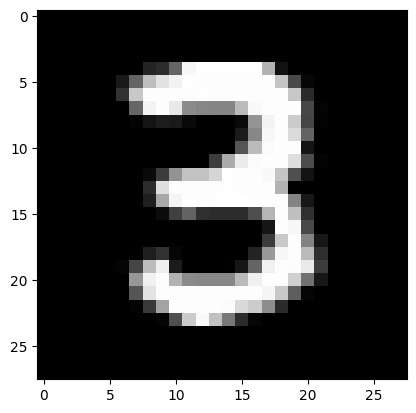

In [6]:
plt.imshow(train_images[7], cmap='grey')
train_labels[7]

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))  # Flatten the input images
model.add(Dense(128, activation='relu'))  # Dense layer with 128 units and ReLU activation
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units (for each digit) and softmax activation


In [8]:
model.compile(optimizer='adam',  # You can use other optimizers like 'sgd' or 'rmsprop'
              loss='categorical_crossentropy',  # For multi-class classification problems
              metrics=['accuracy'])


In [9]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)


Epoch 1/10


2023-12-03 11:12:46.767838: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


844/844 [==============================] - 4s 4ms/step - loss: 0.2972 - accuracy: 0.9179 - val_loss: 0.1461 - val_accuracy: 0.9587
Epoch 2/10
844/844 [==============================] - 3s 3ms/step - loss: 0.1312 - accuracy: 0.9619 - val_loss: 0.0953 - val_accuracy: 0.9730
Epoch 3/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0918 - accuracy: 0.9735 - val_loss: 0.0845 - val_accuracy: 0.9750
Epoch 4/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0720 - accuracy: 0.9789 - val_loss: 0.0713 - val_accuracy: 0.9795
Epoch 5/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0584 - accuracy: 0.9825 - val_loss: 0.0644 - val_accuracy: 0.9793
Epoch 6/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0491 - accuracy: 0.9858 - val_loss: 0.0621 - val_accuracy: 0.9822
Epoch 7/10
844/844 [==============================] - 3s 3ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.0591 - val_accuracy: 0.9830
Epoch 8/10
844/84

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


313/313 [==============================] - 1s 2ms/step - loss: 0.0588 - accuracy: 0.9822
Test Accuracy: 98.22%


In [11]:
img = np.expand_dims(test_images[7], axis=0)
print(model.predict(img))
test_labels[7]

1/1 [==============================] - 0s 110ms/step
[[1.33527038e-07 3.35464403e-02 2.13457207e-09 1.17391686e-07
  1.66657602e-03 1.28532326e-06 1.01594455e-10 2.68039264e-04
  1.00938530e-06 9.64516342e-01]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [29]:
path = r'/home/frepa/Src/mnist/digits'
images = read_image_files(path)

In [13]:
images = adjust_images(images)

In [14]:
images = normalize_images(images)

1/1 [==============================] - 0s 37ms/step


6


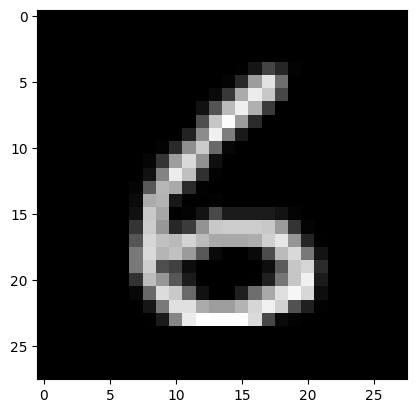

In [15]:
omg = images[9]
img = np.expand_dims(omg, axis=0)
print(np.argmax(model.predict(img)))
plot(omg)

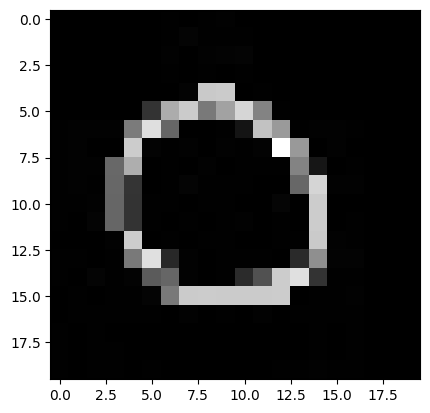

In [33]:
path = r'/home/frepa/Src/mnist/ImageForNumberRecognitions28x28'
pimages = read_image_files(path)
iimages = invert(pimages)
plot(iimages[0])
§ = reshape_20x20(iimages[0])
plot(s)


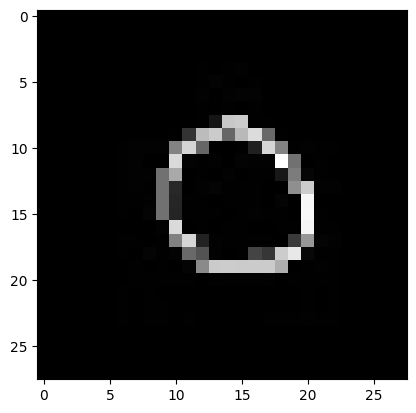

In [23]:
aimages = adjust_images(iimages)

In [40]:
nimages = normalize_images(aimages)

In [12]:
omg = nimages[0]
img = np.expand_dims(omg, axis=0)
print(np.argmax(model.predict(img)))
plot(omg)

NameError: name 'nimages' is not defined